目的: 初步理解如何使用PyTorch進行倒數計算和模型優化。

---

#### 練習1: $y = 3x$，求$\frac{dy}{dx}|_{x=10}$。

In [2]:
import torch
import numpy as np

In [7]:
x = torch.tensor(
    [10.0],
    dtype=torch.float32,
    requires_grad=True,
)  # 未來會有某v對x偏微分

y = 3.0 * x

y.backward()  # 將會把y去對整張算圖內的, 所有已知要算梯度的權重(或是所謂張量), 去算偏微分
print(x.grad)  # 存y對x偏微分的結果

tensor([3.])


#### 練習2: $y = 3x^2$，求$\frac{dy}{dx}|_{x=10}$。

In [ ]:
x = torch.tensor(
    [10.0],
    dtype=torch.float32,
    requires_grad=True,
)  # 未來會有某v對x偏微分

y = 3.0 * (x**2)

y.backward()  # 將會把y去對整張算圖內的, 所有已知要算梯度的權重(或是所謂張量), 去算偏微分
print(x.grad)  # 存y對x偏微分的結果

tensor([120.])


#### 練習3: $z = (x+y)^2$，求$\frac{\partial z}{\partial y}|_{(x=10,y=5)}$。

In [10]:
# FORWARARD PROPAGATION

x = torch.tensor(
    [
        10.0,
    ],
    dtype=torch.float32,
    requires_grad=True,
)  # 未來會有?對x偏微分
y = torch.tensor(
    [
        5.0,
    ],
    dtype=torch.float32,
    requires_grad=True,
)  # 未來會有?對y偏微分
u = x + y
z = u**2

# BACKWARD PROPAGATION
z.backward()  # 將會把y去對整張算圖內的, 所有已知要算梯度的權重(或是所謂張量), 去算偏微分

print(x.grad)  # 存z對x偏微分的結果
print(y.grad)  # 存z對y偏微分的結果

tensor([30.])
tensor([30.])


In [ ]:
u = torch.tensor(
    [10.0, 5.0],
    dtype=torch.float32,
    requires_grad=True,
)  # 未來會有?對u偏微分

z = torch.sum(u) ** 2

z.backward()  # 將會把y去對整張算圖內的, 所有已知要算梯度的權重(或是所謂張量), 去算偏微分
print(u.grad)  # 存z對u偏微分的結果

tensor([30., 30.])


#### 練習4: 試用PyTorch計算$\frac{d\sin(x)}{dx}$。並將$sin(x)$以及$\frac{d\sin(x)}{dx}$透過Matplotlib畫圖。

In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np

In [18]:
# FORWARD PROPAGATION
x = torch.tensor(
    np.linspace(
        0.0,
        2.0 * np.pi,
        100,
    ),
    requires_grad=True,
)
u = torch.sin(
    x
)  # u 攜帶 [sin(0), sin(0+0.063), sin(0+0.063+0.063), ...., sin(2.*np.pi)]
y = torch.sum(u)  # why this?

# BACKWARD PROPAGATION
y.backward()  # 使得x.grad攜帶 [cos(0), cos(0+0.063), cos(0+0.063+0.063), ...., cos(2.*np.pi)]

$y=\sin(x_1) + \sin(x_2) + ... + \sin(x_N)$

$\frac{\partial y}{\partial x_1} = \frac{\sin(x_1)}{\partial x_1}=\cos(x_1)$

$\frac{\partial y}{\partial x_2} = \frac{\sin(x_2)}{\partial x_2}=\cos(x_2)$
..
..
$\frac{\partial y}{\partial x_N} = \frac{\sin(x_N)}{\partial x_N}=\cos(x_N)$


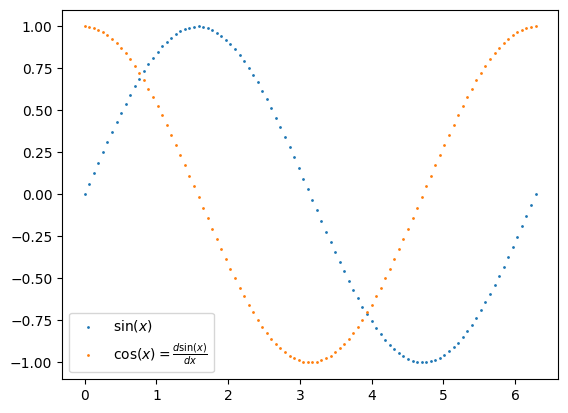

In [ ]:
plt.scatter(
    x.detach().numpy(),
    u.detach().numpy(),  # sine
    label="$\\sin(x)$",
    s=1,
)

plt.scatter(
    x.detach().numpy(),
    x.grad.numpy(),  # cosine
    label="$\\cos(x)=\\frac{d \\sin(x)}{d x}$",
    s=1,
)
plt.legend()
plt.show()

#### 練習5: $Loss=|w_1| + |w_2|$。請用Gradient Descent優化器，優化出可將此$Loss$最小化的最適$w_1$和$w_2$。

Find optimal ($w_1$, $w_2$,..., $w_N$) to minimize Loss. 

Loss (Lasso)=$|w_1|+|w_2|+..+|w_N|$

Answer: ($w_1=0$, $w_2=0$,..., $w_N=0$) 

$L = L_0 + \lambda * L_{l_1}$ (原來Loss+Lasso懲罰項)

when $\lambda * L_{l_1} \gg L_0$, $L\approx \lambda * L_{l_1}$

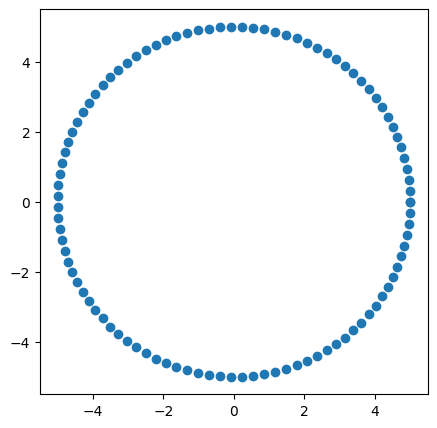

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(w1.detach().numpy(), w2.detach().numpy())

In [39]:
degrees = np.linspace(0, 2.0 * np.pi, 100, dtype=np.float32)
r = 5
w1 = r * np.cos(degrees)
w2 = r * np.sin(degrees)
w1_original = np.copy(w1)
w2_original = np.copy(w2)

w1 = torch.tensor(w1, requires_grad=True)
w2 = torch.tensor(w2, requires_grad=True)

learning_rate: float = 0.1
opt = torch.optim.SGD(params=[w1, w2], lr=learning_rate)

num_iterations: int = 5
for iteration_idx in range(num_iterations):
    print(iteration_idx)

    # FORWARD PROPAGATION
    loss = torch.sum(torch.abs(w1)) + torch.sum(torch.abs(w2))

    # BACKWARD PROPAGATION
    loss.backward()  # 算出loss分別對於w1和w2的偏微分, 換句話說, 得到w1和w2的梯度

    # Loss Optimization
    opt.step()  # 透過ooo的梯度, 將ooo梯度下降

    # opt.zero_grad()  # bad side effect (清掉梯度歷史紀錄, 讓未來沒有機會累加梯度!)

0
1
2
3
4


In [40]:
w1_original[:5]

array([5.       , 4.9899335, 4.959774 , 4.9096437, 4.8397436],
      dtype=float32)

In [41]:
w1[:5]

tensor([3.5000, 3.4899, 3.4598, 3.4096, 3.3397], grad_fn=<SliceBackward0>)

w1:
* iteration 0: $g_{w_1}^{0}$
* iteration 1: $g_{w_1}^{1}$
* iteration 2: $g_{w_1}^{2}$

* iteration 0: $g_{w_1}^{0}=0.1$
* iteration 1: $g_{w_1}^{0} + g_{w_1}^{1}=0.1*2$
* iteration 2: $g_{w_1}^{0} + g_{w_1}^{1} + g_{w_1}^{2}=0.1*3$
* iteration 3: $g_{w_1}^{0} + ... + g_{w_1}^{3}=0.1*4$
* iteration 4: $g_{w_1}^{0} + ... + g_{w_1}^{4}=0.1*5$

In [43]:
0.1 + 0.1 * 2 + 0.1 * 3 + 0.1 * 4 + 0.1 * 5

1.5